In [12]:
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt

plt.style.use("bmh")

### Define MLP model structure

In [2]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, n_layers, n_units, bias):
        super().__init__()
        self.input_size = input_size
        self.n_units  = n_units
        self.n_layers = n_layers
        self.bias = bias
        
        self.input_layer = torch.nn.Linear(self.input_size, self.n_units, bias=self.bias)
        self.relu = torch.nn.ReLU()
        self.hidden_layer = torch.nn.Linear(self.n_units, self.n_units, bias=self.bias)
        self.output_layer = torch.nn.Linear(self.n_units, 1, bias=self.bias)
    def forward(self, x):
        x = self.input_layer(x)
        
        for l in range(self.n_layers):
            x = self.hidden_layer(x)
            x = self.relu(x)
                    
        output = self.output_layer(x)
        
        return output

class MLPWrapper():
    def __init__(self, 
                 learning_rate=None,
                 n_units=None,
                 n_layers=None,
                 optimizer=None,
                 input_size=None,
                 trial=None):

        self.model_name = "mlp"
        self.search_type = 'random'

        learning_rate = learning_rate if learning_rate is not None else trial.suggest_float("learning_rate", 1e-5, 1e-1)
        n_units = n_units if n_units is not None else trial.suggest_int("n_units", 5, 10)
        n_layers = n_layers if n_layers is not None else trial.suggest_int("n_layers", 2, 10)
        optimizer = optimizer if optimizer is not None else trial.suggest_categorical("optimizer", ["SGD"])
        input_size = trial.suggest_int("input_size", input_size, input_size)

        self.params = {
              'learning_rate': learning_rate,
              'n_units': n_units,
              'n_layers': n_layers,
              'optimizer': optimizer,
              'input_size': input_size,
              }
        self.epochs = 100

        self.ModelClass = MLP(input_size=self.params["input_size"],
                              n_layers=self.params["n_layers"],
                              n_units=self.params["n_units"],
                              bias=True)

### Set global parameters

In [6]:
inputs_path = os.path.join(os.getcwd(), "data", "inputs")
target_name = "betas_dgp"
dir_name = "var_0.05_1_150"
d_name = "betadgp_covdgp_data"

### Load train/test data

In [8]:
train_data = pd.read_csv(os.path.join(inputs_path, dir_name, d_name + "_train.csv"))
train_data.set_index(["eq", "variable"], inplace=True)
y_train = train_data[[target_name]].to_numpy()
X_train = train_data.drop([target_name], axis=1).to_numpy()

test_data = pd.read_csv(os.path.join(inputs_path, dir_name, d_name + "_test.csv"))
test_data.set_index(["eq", "variable"], inplace=True)
y_test = test_data[[target_name]].to_numpy()
X_test = test_data.drop([target_name], axis=1).to_numpy()

### Sanity check inputs

No handles with labels found to put in legend.


Text(0.5, 0, "proxy phi's (covariance)")

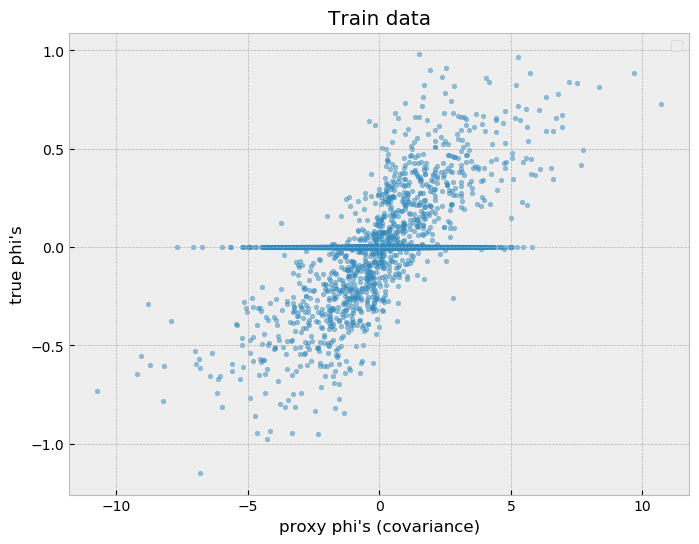

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(y=y_train,
            x=X_train,
            s=10,
            alpha=0.5)
plt.legend(loc='upper right')
plt.title("Train data")
plt.ylabel("true phi's")
plt.xlabel("proxy phi's (covariance)")

No handles with labels found to put in legend.


Text(0.5, 0, "proxy phi's (covariance)")

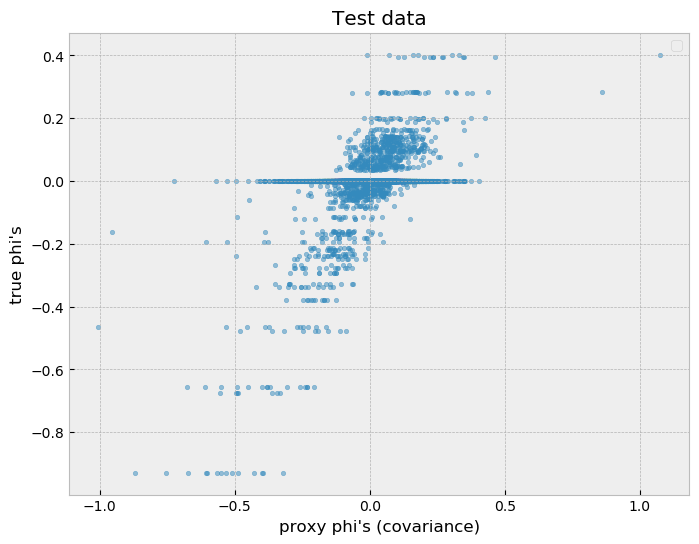

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(y=y_test,
            x=X_test,
            s=10,
            alpha=0.5)
plt.legend(loc='upper right')
plt.title("Test data")
plt.ylabel("true phi's")
plt.xlabel("proxy phi's (covariance)")